In [2]:
import os
import PyPDF2
import fitz

In [3]:
dir = 'annoted_sustainability_reports/Industrials'
 

In [4]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)


annoted_sustainability_reports/Industrials/Caterpillar_sustainability_2021.pdf
Document('annoted_sustainability_reports/Industrials/Caterpillar_sustainability_2021.pdf')
['For example, renewable liquid fuels like hydrotreated vegetable oil (HVO) are being used in our C175-20 engines to provide stand by power at a Microsoft data center in Sweden', ' HVO can reduce carbon intensity by 45% to 85% versus diesel', 'The D6E XE high-drive dozer, for example, offers up to 35% better fuel efficiency and up to 23% less fuel usage than previous models', ' The 795 electric drive mining truck with a diesel-electric drivetrain has been paired with a trolley-assist system that allows the truck to use electric power while traveling uphill, and then switch back to diesel operation if electricity isn’t readily available', ' The trolley system reduces fuel burn by more than 90% while on trolley', 'We began offering generator sets configured to use 100% hydrogen and automated fleets of mining machinery', 

['Our long-term goal is net zero by no later than 2050, and we have announced our intention to set a net zero GHG emission goal covering our airline operations and value chain (Scopes 1, 2 and 3), in alignment with the United Nations Race to Zero – Business Ambition for 1', '5°C campaign', ' We aim to reduce life cycle jet fuel GHG emissions on a per revenue ton kilometer basis by 2035 compared to a 2019 baseline', ' Our ability to achieve our ambitious climate goals is dependent on the actions of governments and third parties and will require, among other things, significant capital investment, including from third parties, research and development from manufacturers and other stakeholders, along with government policies and incentives to reduce the cost, and incent production, of SAF and other technologies that are not presently in existence or available at scale', 'OUR DECARBONIZATION PATHWAY In order to achieve net zero by 2050 and meaningful emissions intensity improvement by 2035

['Reduce greenhouse gas emissions by 15% through 50% renewable-energy supply and excellence in energy efﬁ ciency', ' Reduce greenhouse gas emissions by 15% supply and excellence in energy efﬁ ciency', 'meet customer needs and In 2021, John Deere launched which are the culmination of reduce greenhouse gas emissions', ' In 2021, John Deere launched the C770 Cotton Harvesters, which are the culmination of more than a decade-long journey that started in 2009 to the C770 Cotton Harvesters, which are the culmination of more than a decade-long journey that started in 2009 to revolutionize cotton harvesting', ' These machines represent more than a decade-long journey revolutionize cotton harvesting', ' most signiﬁ cant advancement in The beneﬁ ts of the C770 include an impressive 20-percent fuel savings through efﬁ cient engine technology and machine The beneﬁ ts of the C770 include an impressive 20-percent fuel savings through efﬁ cient engine technology and machine design — reducing fuel cos

In [5]:
#Extracting all sentences from the file
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
    total_sentences = t.split('.')
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)


annoted_sustainability_reports/Industrials/Caterpillar_sustainability_2021.pdf
875
annoted_sustainability_reports/Industrials/Lockheed_Martin_2021_Sustainability_Report.pdf
1496
annoted_sustainability_reports/Industrials/Boeing_2022_Sustainability_Report.pdf
1525
annoted_sustainability_reports/Industrials/UPS_2020_TCFD_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


91
annoted_sustainability_reports/Industrials/Raytheon_2021_ESG_Report.pdf
1576
annoted_sustainability_reports/Industrials/Delta_2021-esg-report.pdf
911
annoted_sustainability_reports/Industrials/Deere_sustainability-report-2021.pdf
1249
annoted_sustainability_reports/Industrials/Honeywell_Corporate-Citizenship-Report.pdf
871
annoted_sustainability_reports/Industrials/3M_2022_Global_Impact_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


3943
annoted_sustainability_reports/Industrials/UnionPacific_2021_climate_action_pln.pdf
398


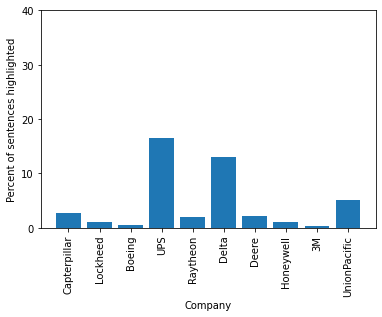

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Capterpillar", "Lockheed", "Boeing", "UPS", "Raytheon", "Delta", "Deere", "Honeywell", "3M", "UnionPacific"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [7]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      4.453020
std       5.660360
min       0.329698
25%       1.059062
50%       2.096093
75%       4.454559
max      16.483516
dtype: float64

In [8]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

IND_reltext = rel_text
IND_alltext = all_text

%store IND_reltext
%store IND_alltext

Stored 'IND_reltext' (list)
Stored 'IND_alltext' (list)
